class             0    1
foreign_worker          
no                4   33
yes             296  667
savings_status  High  Low  Medium  No Savings
employment                                   
Amateur           12  120      17          23
Experienced       18  100      24          32
Expert            34  133      22          64
Professional      44  210      33          52
Unemployed         3   40       7          12
Average credit amount of single males that have 4<=X<7 years of experience: 4142.592592592592
Average credit duration of Skilled: 21.41111111111111
Average credit duration of Unskilled:  16.535
Average credit duration of high qualif/self emp/mgmt: 25.16891891891892
Average credit duration of unemp/unskilled non res: 17.363636363636363
Most common checking status: No Checking
Most common savings status: Low


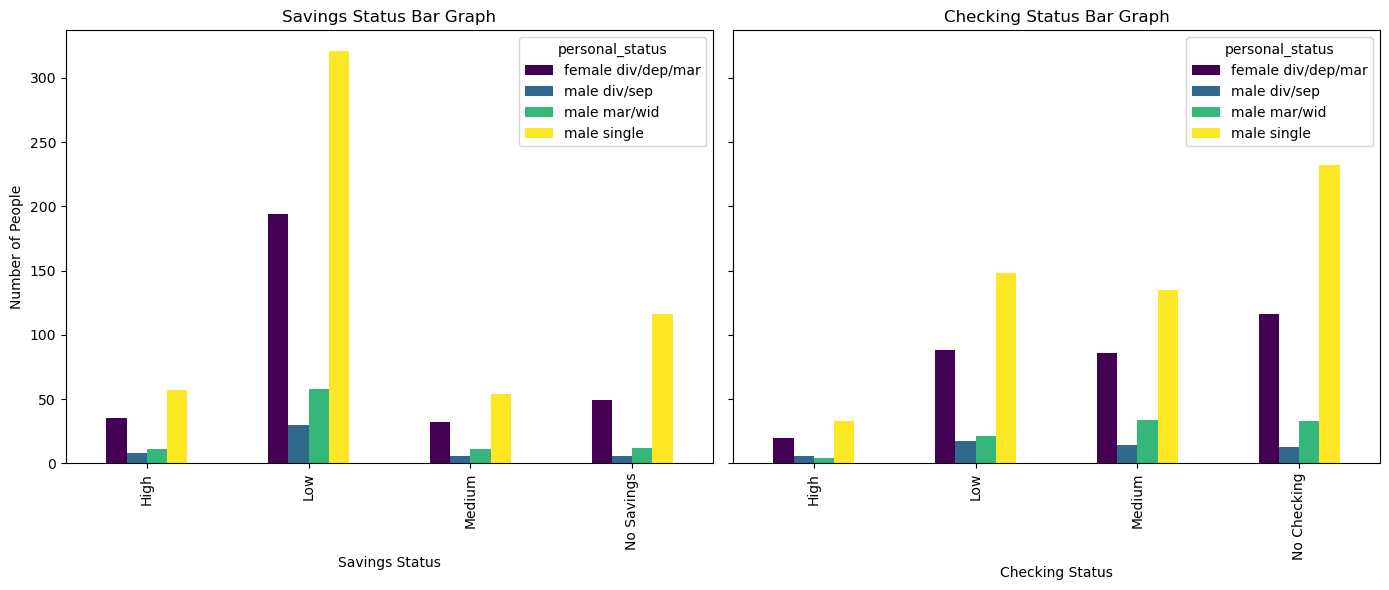

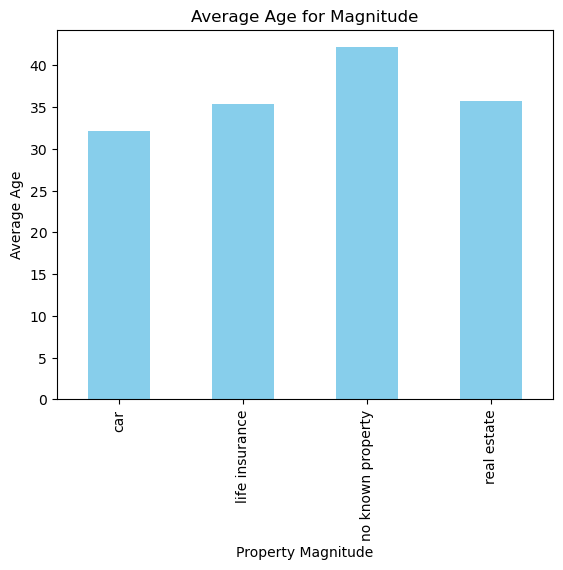

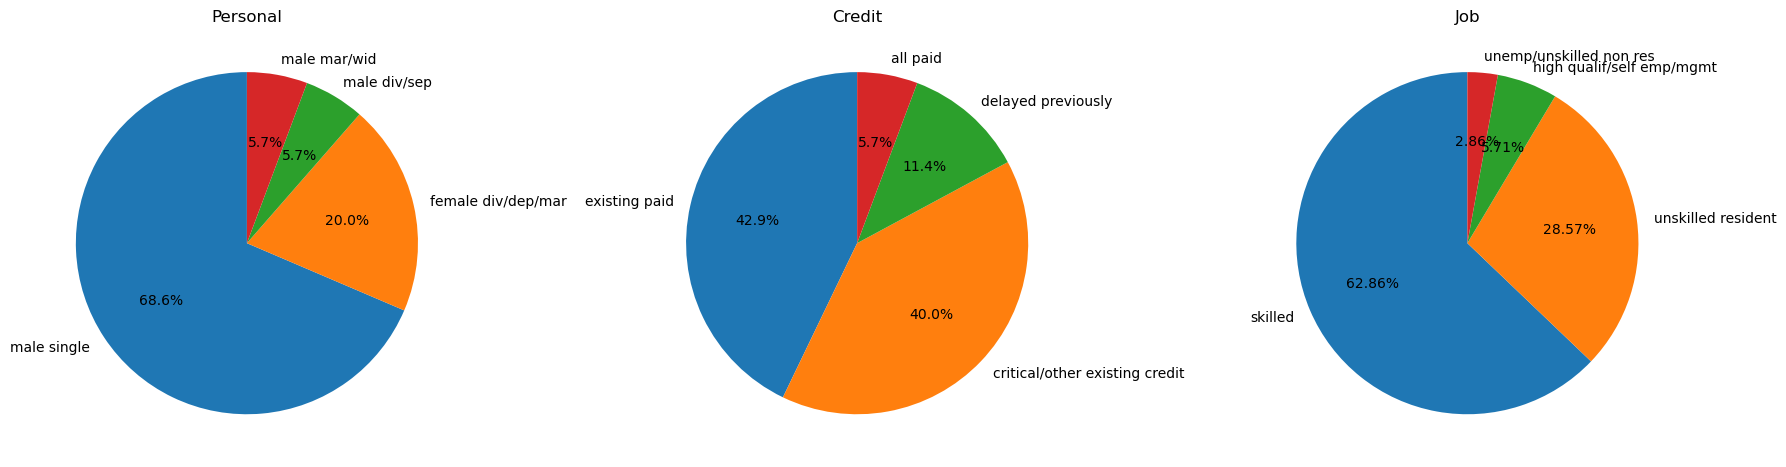

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('GermanCredit.csv')

def part1():
    noneList = []
    for x in df:
        valueCounts = df[x].value_counts()
        countNones = valueCounts.get('none',0)
        if countNones > 0:
            noneList.append(x)
    df.drop(columns = noneList, inplace = True)

def part2(df):
    def removeApostrophe(x):
        if isinstance(x, str):
            return x.replace("'","")
        return x
    for column in df.columns:
        df[column] = df[column].map(removeApostrophe)

def part3(df):
    df["checking_status"] = df["checking_status"].str.replace("no checking", "No Checking")
    df["checking_status"] = df["checking_status"].str.replace("<0", "Low")
    df["checking_status"] = df["checking_status"].str.replace("0<=X<200", "Medium")
    df["checking_status"] = df["checking_status"].str.replace(">=200", "High")

def part4(df):
    def replace_savings_status(value):
        if value == "no known savings":
            return "No Savings"
        elif value == "<100":
            return "Low"
        elif value == "100<=X<500":
            return "Medium"
        elif value == "500<=X<1000":
            return "High"
        elif value == ">=1000":
            return "High"
        else:
            return value

    df['savings_status'] = df['savings_status'].apply(replace_savings_status)

def part5(df):
    df["class"] = df["class"].str.replace("good","1")
    df["class"] = df["class"].str.replace("bad","0")

def part6(df):
    df["employment"] = df["employment"].str.replace("unemployed","Unemployed")
    df["employment"] = df["employment"].str.replace("<1","Amateur")
    df["employment"] = df["employment"].str.replace("1<=X<4","Professional")
    df["employment"] = df["employment"].str.replace("4<=X<7","Experienced")
    df["employment"] = df["employment"].str.replace(">=7","Expert")

def part7(df):
    crossTab = pd.crosstab(df["foreign_worker"],df["class"])
    print(crossTab)

def part8(df):
    crossTab = pd.crosstab(df["employment"],df["savings_status"])
    print(crossTab)   

def part9(df):
    filteredDf = df[df['personal_status'] == 'male single']

    averageValue = filteredDf.loc[df['employment'] == "Experienced", 'credit_amount'].mean()
    print(f'Average credit amount of single males that have 4<=X<7 years of experience: {averageValue}')

def part10(df):
    uniqueJobTypes = df['job'].unique()
    averageValueSkilled = df.loc[df['job'] == "skilled", 'duration'].mean()
    averageValueUnskilled = df.loc[df['job'] == "unskilled resident", 'duration'].mean()
    averageValueHighQual = df.loc[df['job'] == "high qualif/self emp/mgmt", 'duration'].mean()
    averageValueUnemployed = df.loc[df['job'] == "unemp/unskilled non res", 'duration'].mean()

    print(f'Average credit duration of Skilled: {averageValueSkilled}')
    print(f'Average credit duration of Unskilled:  {averageValueUnskilled}')
    print(f'Average credit duration of high qualif/self emp/mgmt: {averageValueHighQual}')
    print(f'Average credit duration of unemp/unskilled non res: {averageValueUnemployed}')


def part11(df):
    crossTab = pd.crosstab(df["purpose"],df["savings_status"])

    crossTab2 = pd.crosstab(df["purpose"],df["checking_status"])

    eduSavingStatus = crossTab.loc['education'].idxmax()
    eduCheckingStatus = crossTab2.loc['education'].idxmax()
    print(f'Most common checking status: {eduCheckingStatus}')
    print(f'Most common savings status: {eduSavingStatus}')
def part12(df):
    Savings = df.groupby(['savings_status', 'personal_status']).size().unstack()

    Checking = df.groupby(['checking_status', 'personal_status']).size().unstack()

    f, (ax1,ax2) = plt.subplots(1, 2, figsize = (14,6), sharex='col', sharey='row') 

    Savings.plot(kind='bar', ax=ax1, colormap='viridis')
    ax1.set_title('Savings Status Bar Graph')
    ax1.set_xlabel('Savings Status')
    ax1.set_ylabel('Number of People')

    Checking.plot(kind='bar', ax=ax2, colormap='viridis')
    ax2.set_title('Checking Status Bar Graph')
    ax2.set_xlabel('Checking Status')
    ax2.set_ylabel('Number of People')

    plt.tight_layout() 
    plt.show()
def part13(df):
    filteredDf = df[df['credit_amount'] > 4000]
    averageAge = filteredDf.groupby('property_magnitude')['age'].mean()
    averageAge.plot(kind='bar', color='skyblue')
    plt.title('Average Age for Magnitude')
    plt.xlabel('Property Magnitude')
    plt.ylabel('Average Age')
    plt.show()
def part14(df):
    filteredDf = df[(df['savings_status'] == 'High') & (df['age'] > 40)]
    fig, (axes1,axes2,axes3) = plt.subplots(1, 3, figsize=(18, 6))  

    #filter that thang
    personalStatusCount = filteredDf['personal_status'].value_counts()
    axes1.pie(personalStatusCount, labels=personalStatusCount.index, autopct='%1.1f%%', startangle=90)
    axes1.set_title('Personal')

    creditHistoryCount = filteredDf['credit_history'].value_counts()
    axes2.pie(creditHistoryCount, labels=creditHistoryCount.index, autopct='%1.1f%%', startangle=90)
    axes2.set_title('Credit')

    jobCount = filteredDf['job'].value_counts()
    axes3.pie(jobCount, labels=jobCount.index, autopct='%1.2f%%', startangle=90)
    axes3.set_title('Job')

    plt.tight_layout()  
    plt.show()

part1()
part2(df)
part3(df)
part4(df)
part5(df)
part6(df)
part7(df)
part8(df)
part9(df)
part10(df)
part11(df)
part12(df)
part13(df)
part14(df)
df.to_csv('Modified_GermanCredit.csv', index=False)
